Current working directory: c:\Users\Admin\Desktop\ETL_Midterm_Queen_897
Before Transformation 1 - Missing Values:
Raw Data: {'order_id': 0, 'customer_name': 0, 'product': 0, 'quantity': 3, 'unit_price': 3, 'order_date': 0, 'region': 2}
Incremental Data: {'order_id': 0, 'customer_name': 6, 'product': 0, 'quantity': 4, 'unit_price': 1, 'order_date': 0, 'region': 2}

After Transformation 1 - Missing Values:
Raw Data: {'order_id': 0, 'customer_name': 0, 'product': 0, 'quantity': 0, 'unit_price': 0, 'order_date': 0, 'region': 0}
Incremental Data: {'order_id': 0, 'customer_name': 0, 'product': 0, 'quantity': 0, 'unit_price': 0, 'order_date': 0, 'region': 0}
Explanation: Filled missing customer_name and region with 'Unknown', quantity with median, unit_price with mean, order_date with 'Unknown'.

Before Transformation 2 - Duplicates in Raw Data:
   order_id customer_name product  quantity  unit_price order_date region
3         4           Eve  Laptop       2.0       750.0   1/7/2024   West
5

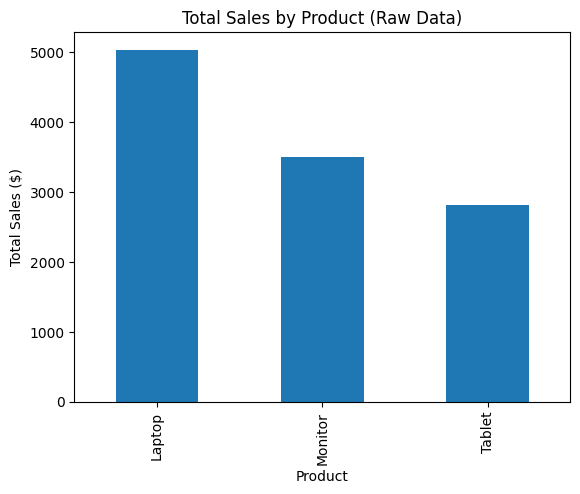

Bonus: Created bar chart of total sales by product, saved as sales_by_product.png

Transformed files saved to data/transformed/


In [5]:
# etl_transform.ipynb
import pandas as pd
import os
import matplotlib.pyplot as plt

# Set correct working directory
project_folder = r'c:\Users\Admin\Desktop\ETL_Midterm_Queen_897'
os.chdir(project_folder)
print("Current working directory:", os.getcwd())

# Verify input files
if not os.path.exists('data/raw_data.csv') or not os.path.exists('data/incremental_data.csv'):
    raise FileNotFoundError("Ensure raw_data.csv and incremental_data.csv are in the data/ folder")

# Load raw data
raw_df = pd.read_csv('data/raw_data.csv')
incremental_df = pd.read_csv('data/incremental_data.csv')

# Convert quantity and unit_price to numeric
raw_df['quantity'] = pd.to_numeric(raw_df['quantity'], errors='coerce')
raw_df['unit_price'] = pd.to_numeric(raw_df['unit_price'], errors='coerce')
incremental_df['quantity'] = pd.to_numeric(incremental_df['quantity'], errors='coerce')
incremental_df['unit_price'] = pd.to_numeric(incremental_df['unit_price'], errors='coerce')

# Transformation 1: Handle missing values
print("Before Transformation 1 - Missing Values:")
print("Raw Data:", raw_df.isna().sum().to_dict())
print("Incremental Data:", incremental_df.isna().sum().to_dict())

raw_df['customer_name'] = raw_df['customer_name'].fillna('Unknown')
raw_df['region'] = raw_df['region'].fillna('Unknown')
raw_df['quantity'] = raw_df['quantity'].fillna(raw_df['quantity'].median())
raw_df['unit_price'] = raw_df['unit_price'].fillna(raw_df['unit_price'].mean())
raw_df['order_date'] = raw_df['order_date'].fillna('Unknown')

incremental_df['customer_name'] = incremental_df['customer_name'].fillna('Unknown')
incremental_df['region'] = incremental_df['region'].fillna('Unknown')
incremental_df['quantity'] = incremental_df['quantity'].fillna(incremental_df['quantity'].median())
incremental_df['unit_price'] = incremental_df['unit_price'].fillna(incremental_df['unit_price'].mean())
incremental_df['order_date'] = incremental_df['order_date'].fillna('Unknown')

print("\nAfter Transformation 1 - Missing Values:")
print("Raw Data:", raw_df.isna().sum().to_dict())
print("Incremental Data:", incremental_df.isna().sum().to_dict())
print("Explanation: Filled missing customer_name and region with 'Unknown', quantity with median, unit_price with mean, order_date with 'Unknown'.")

# Transformation 2: Remove duplicates
print("\nBefore Transformation 2 - Duplicates in Raw Data:")
print(raw_df[raw_df.duplicated(keep=False)])
raw_df = raw_df.drop_duplicates()
print("\nAfter Transformation 2 - Duplicates in Raw Data:")
print(raw_df[raw_df.duplicated(keep=False)])
print("Explanation: Removed duplicate row for order_id=4 in raw_data.")

# Transformation 3: Enrichment - Add total_price column
raw_df['total_price'] = raw_df['quantity'] * raw_df['unit_price']
incremental_df['total_price'] = incremental_df['quantity'] * incremental_df['unit_price']
print("\nAfter Transformation 3 - Added total_price:")
print(raw_df[['quantity', 'unit_price', 'total_price']].head())
print(incremental_df[['quantity', 'unit_price', 'total_price']].head())
print("Explanation: Created total_price by multiplying quantity and unit_price for analysis.")

# Transformation 4: Structural - Convert order_date to datetime
raw_df['order_date'] = pd.to_datetime(raw_df['order_date'], errors='coerce')
incremental_df['order_date'] = pd.to_datetime(incremental_df['order_date'], errors='coerce')
print("\nAfter Transformation 4 - Date Conversion:")
print(raw_df[['order_date']].head())
print(incremental_df[['order_date']].head())
print("Explanation: Converted order_date to datetime; invalid dates (e.g., 'Unknown') become NaT.")

# Bonus: Visualization - Total sales by product
sales_by_product = raw_df.groupby('product')['total_price'].sum()
sales_by_product.plot(kind='bar', title='Total Sales by Product (Raw Data)')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.savefig('sales_by_product.png')
plt.show()
print("Bonus: Created bar chart of total sales by product, saved as sales_by_product.png")

# Create transformed directory
os.makedirs('data/transformed', exist_ok=True)

# Save transformed data
raw_df.to_csv('data/transformed/transformed_full.csv', index=False)
incremental_df.to_csv('data/transformed/transformed_incremental.csv', index=False)
print("\nTransformed files saved to data/transformed/")